# Unsupervised Learning and Recommendations with Scikit Learn


<img src="images/bg.png">

The following topics are covered in this tutorial:

- Overview of unsupervised learning algorithms in Scikit-learn
- Clustering algorithms: K Means, DBScan, Hierarchical clustering etc.
- Dimensionality reduction (PCA) and manifold learning (t-SNE)

## Clustering

Clustering is the process of grouping objects from a dataset such that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups ([Wikipedia](https://en.wikipedia.org/wiki/Cluster_analysis)). Scikit-learn offers several clustering algorithms. You can learn more about them here: https://scikit-learn.org/stable/modules/clustering.html

We'll use the [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) to study some of the clustering algorithms available in `scikit-learn`. It contains various measurements for 150 flowers belonging to 3 different species.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
iris_df = sns.load_dataset('iris')

In [3]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<Axes: xlabel='sepal_length', ylabel='petal_length'>

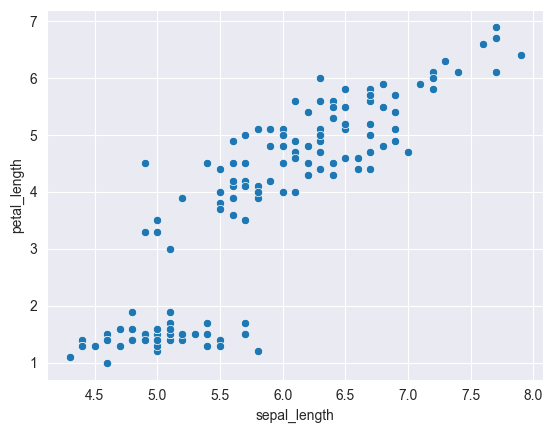

In [7]:
sns.scatterplot(data=iris_df, x='sepal_length', y='petal_length')

In [5]:
numeric_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

In [6]:
X = iris_df[numeric_cols]

### K Means Clustering

The K-means algorithm attempts to classify objects into a pre-determined number of clusters by finding optimal central points (called centroids) for each cluster. Each object is classifed as belonging the cluster represented by the closest centroid.

<img src="https://miro.medium.com/max/1400/1*rw8IUza1dbffBhiA4i0GNQ.png" width="640">

Here's how the K-means algorithm works:

1. Pick K random objects as the initial cluster centers.
2. Classify each object into the cluster whose center is closest to the point.
3. For each cluster of classified objects, compute the centroid (mean).
4. Now reclassify each object using the centroids as cluster centers.
5. Calculate the total variance of the clusters (this is the measure of goodness).
6. Repeat steps 1 to 6 a few more times and pick the cluster centers with the lowest total variance.


In [8]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=42)

model.fit(X)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [10]:
preds = model.predict(X)

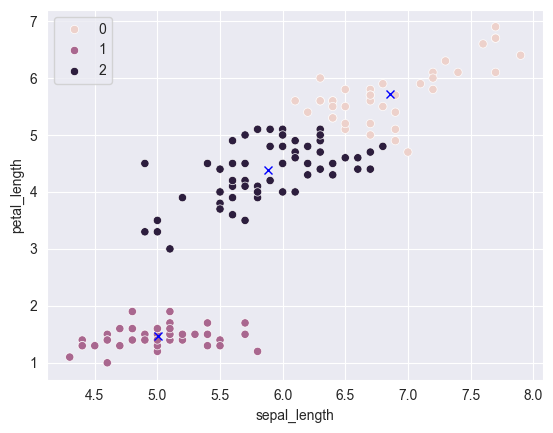

In [11]:
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=preds);
centers_x, centers_y = model.cluster_centers_[:,0], model.cluster_centers_[:,2]
plt.plot(centers_x, centers_y, 'xb')

As you can see, K-means algorithm was able to classify (for the most part) different specifies of flowers into separate clusters. Note that we did not provide the "species" column as an input to `KMeans`.

We can check the "goodness" of the fit by looking at `model.inertia_`, which contains the sum of squared distances of samples to their closest cluster center. Lower the inertia, better the fit.

In [13]:
model = KMeans(n_clusters=6, random_state=42).fit(X)

preds = model.predict(X)

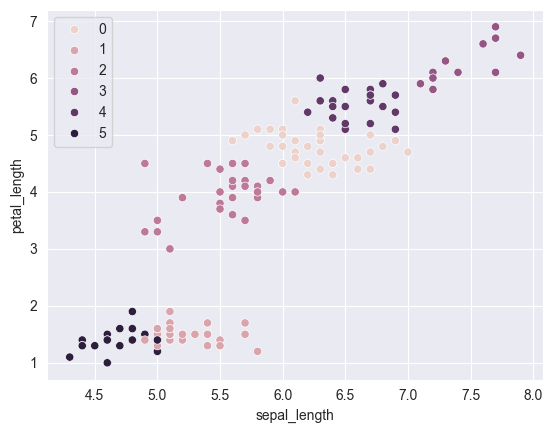

In [14]:
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=preds);

In most real-world scenarios, there's no predetermined number of clusters. In such a case, you can create a plot of "No. of clusters" vs "Inertia" to pick the right number of clusters.


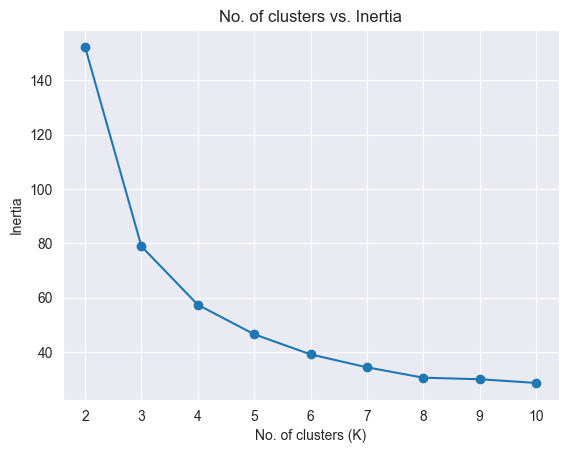

In [16]:
options = range(2,11)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(X)
    inertias.append(model.inertia_)

plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o')
plt.xlabel('No. of clusters (K)')
plt.ylabel('Inertia');

The chart is creates an "elbow" plot, and you can pick the number of clusters beyond which the reduction in inertia decreases sharply.

**Mini Batch K Means**: The K-means algorithm can be quite slow for really large dataset. Mini-batch K-means is an iterative alternative to K-means that works well for large datasets. Learn more about it here: https://scikit-learn.org/stable/modules/clustering.html#mini-batch-kmeans
